In [1]:
using PyPlot
using AlfvenDetectors
using DelimitedFiles

┌ Info: Recompiling stale cache file /home/vit/.julia/compiled/v1.1/AlfvenDetectors/VqnlF.ji for AlfvenDetectors [5e555b46-3391-11e9-1beb-e9498a8cd634]
└ @ Base loading.jl:1184


In [2]:
datapath = "/home/vit/vyzkum/alfven/cdb_data/uprobe_data/"

"/home/vit/vyzkum/alfven/cdb_data/uprobe_data/"

In [3]:
files = readdir(datapath);
length(files)

1028

In [4]:
patchsize = 128
outpath = "/home/vit/.julia/environments/v1.1/dev/AlfvenDetectors/experiments/conv/data/"
outfile = joinpath(outpath,"labeled_patches.csv")
labelarray = Array{Any,2}(["shot" "tstart" "fstart" "label"])

1×4 Array{Any,2}:
 "shot"  "tstart"  "fstart"  "label"

In [5]:
data,header=readdlm(outfile,',',header=true)

([10000.0 1.023 1.3e6 1.0; 10000.0 1.02953 1.2e6 1.0; … ; 10418.0 1.20069 625000.0 0.0; 10418.0 1.20725 625000.0 0.0], AbstractString["shot" "tstart" "fstart" "label"])

### If there are some saved labels already, load them into the label array

In [6]:
labelarray = readdlm(outfile,',')

303×4 Array{Any,2}:
      "shot"   "tstart"        "fstart"   "label"
 10000.0      1.023           1.3e6      1.0     
 10000.0      1.02953         1.2e6      1.0     
 10000.0      1.03608         1.2e6      1.0     
 10000.0      1.03608         1.6e6      1.0     
 10000.0      1.04919         1.2e6      1.0     
 10000.0      1.05575         1.5e6      1.0     
 10000.0      1.06235         1.4e6      1.0     
 10001.0      1.02            1.2e6      1.0     
 10001.0      1.02651         1.2e6      1.0     
 10001.0      1.03306         1.2e6      1.0     
 10001.0      1.04617         1.3e6      1.0     
 10001.0      1.03962         1.3e6      1.0     
     ⋮                                           
 10418.0      1.13516    625000.0        0.0     
 10418.0      1.14171    625000.0        0.0     
 10418.0      1.14826    625000.0        0.0     
 10418.0      1.15482    625000.0        0.0     
 10418.0      1.16137    625000.0        0.0     
 10418.0      1.16792    62500

### First show the full shot

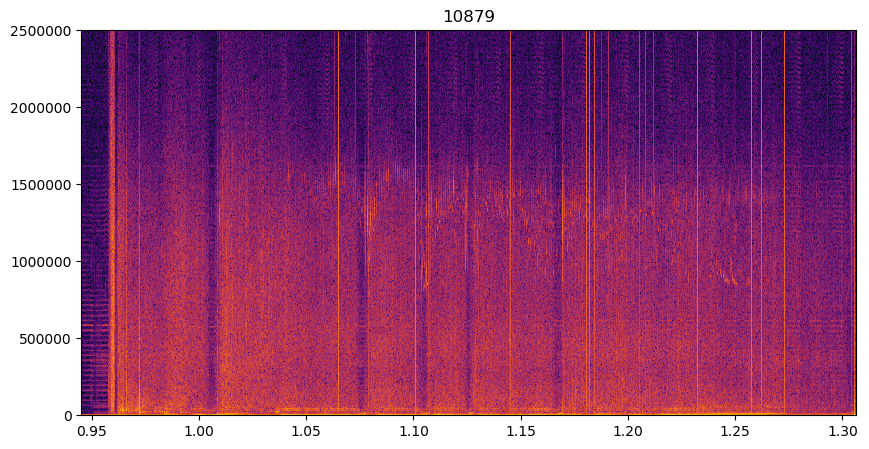

PyObject <matplotlib.collections.QuadMesh object at 0x7f9c74b93080>

In [240]:
shotno = 10000 + 879
file = joinpath(datapath, filter(x->occursin("$shotno", x), files)[1])
# use getsignal so that some of the data is ommited as not being interesting
data = AlfvenDetectors.get_signal(file, AlfvenDetectors.readnormlogupsd; memorysafe=true);
t = AlfvenDetectors.get_signal(file, AlfvenDetectors.readtupsd; memorysafe=true);
f = AlfvenDetectors.readfupsd(file; memorysafe=true);
size(data)
cmap = "inferno"
figure(figsize=(10,5))
title(shotno)
pcolormesh(t,f,data,cmap=cmap)

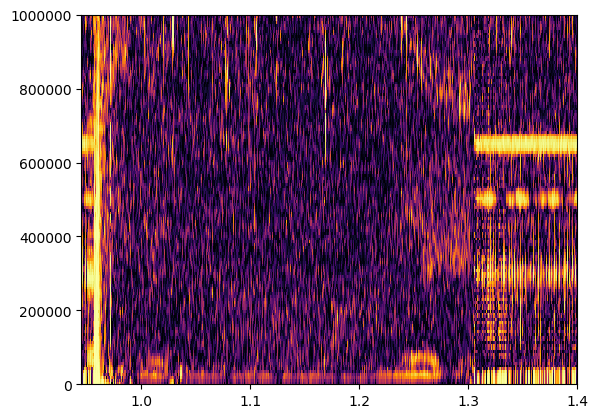

PyObject <matplotlib.collections.QuadMesh object at 0x7f9c74fa6dd8>

In [241]:
mscfile = "/home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata$(shotno).h5"
mscdata = AlfvenDetectors.readmscamp(mscfile, 12; memorysafe=true);
tmsc = AlfvenDetectors.readtcoh(mscfile; memorysafe=true)
fmsc = AlfvenDetectors.readfcoh(mscfile; memorysafe=true)
pcolormesh(tmsc, fmsc, mscdata, cmap=cmap)

### Then cut just the chirp data

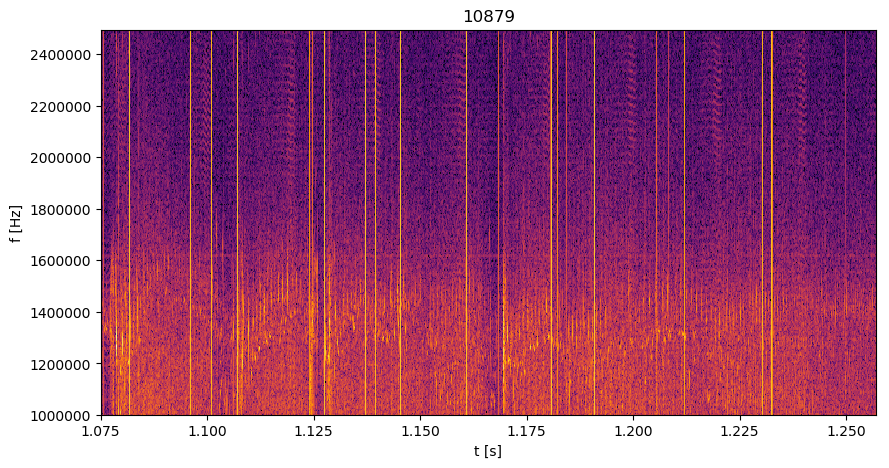

PyObject Text(24.0, 0.5, 'f [Hz]')

In [242]:
figure(figsize=(10,5))
title(shotno)
ylim = [1000000,2500000]
xlim = [1.075, 1.257]
yinds = ylim[1] .< f .< ylim[2]
xinds = xlim[1] .< t .< xlim[2]
pcolormesh(t[xinds],f[yinds],data[yinds,xinds],cmap=cmap)
xlabel("t [s]")
ylabel("f [Hz]")

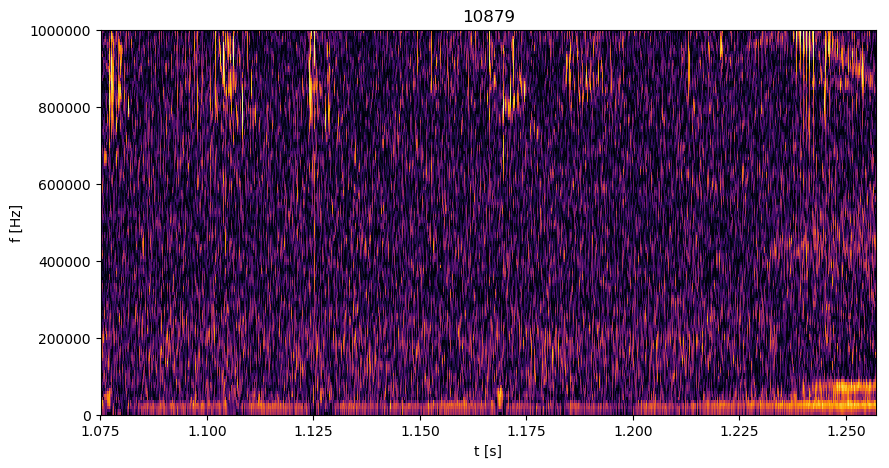

PyObject Text(24.0, 0.5, 'f [Hz]')

In [243]:
figure(figsize=(10,5))
title(shotno)
xinds = xlim[1] .< tmsc .< xlim[2]
pcolormesh(tmsc[xinds],fmsc,mscdata[:,xinds],cmap=cmap)
xlabel("t [s]")
ylabel("f [Hz]")

### Finally, cut the individual patches

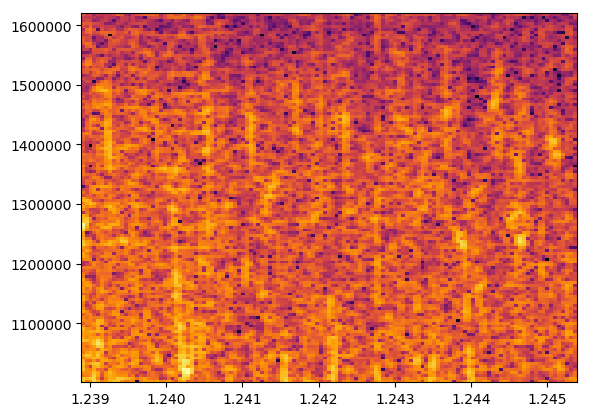

1

In [309]:
#fstart = ylim[1]
#fstart = fpatch[end]
#fstart = minimum(f)
fstart = 1000000

#tstart = xlim[1]
tstart = tpatch[end]
#tstart = minimum(t)
tinds = tstart .< t
finds = fstart .< f
tpatch = t[tinds][1:patchsize]
fpatch = f[finds][1:patchsize]
patch = data[finds,tinds][1:patchsize,1:patchsize]
pcolormesh(tpatch, fpatch, patch,cmap=cmap)
label = 1

In [307]:
labelarray = vcat(labelarray, [shotno tstart fstart label])

372×4 Array{Any,2}:
      "shot"   "tstart"   "fstart"   "label"
 10000.0      1.023      1.3e6      1.0     
 10000.0      1.02953    1.2e6      1.0     
 10000.0      1.03608    1.2e6      1.0     
 10000.0      1.03608    1.6e6      1.0     
 10000.0      1.04919    1.2e6      1.0     
 10000.0      1.05575    1.5e6      1.0     
 10000.0      1.06235    1.4e6      1.0     
 10001.0      1.02       1.2e6      1.0     
 10001.0      1.02651    1.2e6      1.0     
 10001.0      1.03306    1.2e6      1.0     
 10001.0      1.04617    1.3e6      1.0     
 10001.0      1.03962    1.3e6      1.0     
     ⋮                                      
 10879.0      1.15364    1.0e6      1.0     
 10879.0      1.16019    1.0e6      1.0     
 10879.0      1.16675    1.0e6      1.0     
 10879.0      1.1733     1.0e6      1.0     
 10879.0      1.17985    1.0e6      1.0     
 10879.0      1.18641    1.0e6      1.0     
 10879.0      1.19296    1.0e6      1.0     
 10879.0      1.19952    1.0e6     

In [310]:
savearray = deepcopy(labelarray)

372×4 Array{Any,2}:
      "shot"   "tstart"   "fstart"   "label"
 10000.0      1.023      1.3e6      1.0     
 10000.0      1.02953    1.2e6      1.0     
 10000.0      1.03608    1.2e6      1.0     
 10000.0      1.03608    1.6e6      1.0     
 10000.0      1.04919    1.2e6      1.0     
 10000.0      1.05575    1.5e6      1.0     
 10000.0      1.06235    1.4e6      1.0     
 10001.0      1.02       1.2e6      1.0     
 10001.0      1.02651    1.2e6      1.0     
 10001.0      1.03306    1.2e6      1.0     
 10001.0      1.04617    1.3e6      1.0     
 10001.0      1.03962    1.3e6      1.0     
     ⋮                                      
 10879.0      1.15364    1.0e6      1.0     
 10879.0      1.16019    1.0e6      1.0     
 10879.0      1.16675    1.0e6      1.0     
 10879.0      1.1733     1.0e6      1.0     
 10879.0      1.17985    1.0e6      1.0     
 10879.0      1.18641    1.0e6      1.0     
 10879.0      1.19296    1.0e6      1.0     
 10879.0      1.19952    1.0e6     

In [311]:
writedlm(outfile, savearray, ",")

In [118]:
readdir(joinpath(dirname(pathof(AlfvenDetectors)), "../experiments/conv/data"))

3-element Array{String,1}:
 "labeled_patches.csv"     
 "labeled_patches_orig.csv"
 "labeled_shots.csv"       